In [1]:
bucket = 'tf-workshop'
prefix = 'sagemaker/DEMO-image-classification'

import sagemaker
role = sagemaker.get_execution_role()

import os
import pandas as pd
import numpy as np
import boto3
import json
import matplotlib.pyplot as plt

In [22]:
# refs
# https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_applying_machine_learning/gluon_recommender_system/gluon_recommender_system.ipynb
#

In [2]:
!mkdir /tmp/fastai-images
!touch /tmp/fastai-images/text.txt

In [3]:
!aws s3 ls s3://fast-ai-imageclas

2018-10-08 22:52:32 1150585339 CUB_200_2011.tgz
2018-12-05 13:54:42 4579163978 bedroom.tgz
2018-10-27 05:11:43  131740031 caltech_101.tgz
2018-10-09 22:27:30  135107811 cifar10.tgz
2018-10-08 22:52:29  169168619 cifar100.tgz
2018-10-08 22:52:44 5686607260 food-101.tgz
2018-10-14 18:26:34   15683414 mnist_png.tgz
2019-02-02 18:07:20     565372 mnist_var_size_tiny.tgz
2018-10-08 22:53:35  345236087 oxford-102-flowers.tgz
2018-10-08 22:53:40  811706944 oxford-iiit-pet.tgz
2018-10-08 22:54:10 1957803273 stanford-cars.tgz


In [4]:
!aws s3 cp s3://fast-ai-imageclas/oxford-102-flowers.tgz /tmp/fastai-images/

download: s3://fast-ai-imageclas/oxford-102-flowers.tgz to ../../../../tmp/fastai-images/oxford-102-flowers.tgz


In [5]:
!ls /tmp/fastai-images

oxford-102-flowers.tgz	text.txt


In [7]:
!tar zxf /tmp/fastai-images/oxford-102-flowers.tgz -C /tmp/fastai-images

In [8]:
!ls /tmp/fastai-images/oxford-102-flowers/jpg | wc -l

8189


In [9]:
!ls /tmp/fastai-images/oxford-102-flowers

jpg  test.txt  train.txt  valid.txt


In [10]:
# dataset specific processing
# metadata is text file like:
# /oxford-102-flowers/train.txt
'''
jpg/image_03860.jpg 16
jpg/image_06092.jpg 13
jpg/image_02400.jpg 42
jpg/image_02852.jpg 21
...
'''

def read_oxford_metadata(filename):
    '''
    reads oxford flowers metadata given path
    returns list of (image_path, flower_class) pairs
    '''
    with open(filename) as f:
        read_data = f.read()
    f.close()
    metadata = read_data.strip().split('\n')
    metadata = [x.split() for x in metadata]
    return metadata

In [11]:
train = read_oxford_metadata('/tmp/fastai-images/oxford-102-flowers/train.txt')
test = read_oxford_metadata('/tmp/fastai-images/oxford-102-flowers/test.txt')
valid = read_oxford_metadata('/tmp/fastai-images/oxford-102-flowers/valid.txt')

In [12]:
train[-10:]

[['jpg/image_04045.jpg', '11'],
 ['jpg/image_06142.jpg', '63'],
 ['jpg/image_07082.jpg', '66'],
 ['jpg/image_03345.jpg', '7'],
 ['jpg/image_07587.jpg', '94'],
 ['jpg/image_02944.jpg', '59'],
 ['jpg/image_07434.jpg', '93'],
 ['jpg/image_02684.jpg', '57'],
 ['jpg/image_01639.jpg', '81'],
 ['jpg/image_03165.jpg', '10']]

In [13]:
test[:10]

[['jpg/image_06977.jpg', '34'],
 ['jpg/image_00800.jpg', '80'],
 ['jpg/image_05038.jpg', '58'],
 ['jpg/image_06759.jpg', '0'],
 ['jpg/image_01133.jpg', '45'],
 ['jpg/image_07982.jpg', '100'],
 ['jpg/image_04468.jpg', '89'],
 ['jpg/image_02363.jpg', '42'],
 ['jpg/image_01393.jpg', '50'],
 ['jpg/image_07216.jpg', '6']]

In [14]:
valid[:10]

[['jpg/image_04467.jpg', '89'],
 ['jpg/image_07129.jpg', '44'],
 ['jpg/image_05166.jpg', '4'],
 ['jpg/image_07002.jpg', '34'],
 ['jpg/image_02007.jpg', '79'],
 ['jpg/image_02830.jpg', '55'],
 ['jpg/image_05373.jpg', '21'],
 ['jpg/image_01335.jpg', '50'],
 ['jpg/image_04652.jpg', '47'],
 ['jpg/image_07083.jpg', '66']]

In [15]:
# are all the extensions .jpg ?
from pathlib import Path
{Path(x[0]).suffix for x in test}

{'.jpg'}

In [16]:
def decorate_path(path):
    '''
    prefixes image path with dataset directory
    returns full path to image
    '''
    return os.path.join('/tmp/fastai-images/oxford-102-flowers/', path)

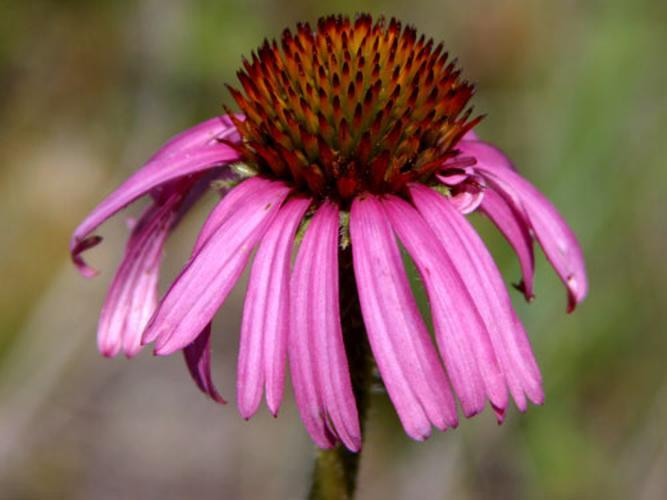

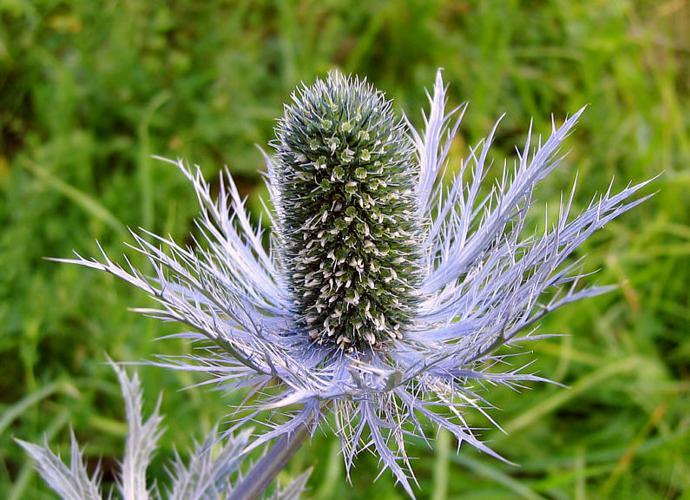

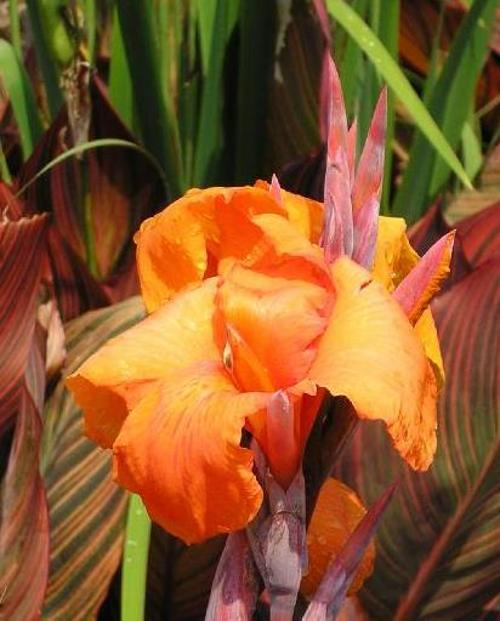

In [17]:
# preview images

from IPython.display import display, Image
display(Image(filename=decorate_path(train[0][0])))
display(Image(filename=decorate_path(test[0][0])))
display(Image(filename=decorate_path(valid[0][0])))